In [1]:
include("PVCR.jl");

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:407
└ @ PyCall /Users/arnavgautam/.julia/packages/PyCall/ttONZ/src/PyCall.jl:407
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = get_nsrdb_sam_df() at retrieve_nsrdb_data.jl:92
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/retrieve_nsrdb_data.jl:92
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = #get_nsrdb_sam_pv_output#73(::Bool, ::Function) at retrieve_nsrdb_data.jl:100
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/retrieve_nsrdb_data.jl:100


 0.00 %  @ 0
 0.67 %  @ 175
 1.34 %  @ 350
 2.00 %  @ 525
 2.67 %  @ 700
 3.33 %  @ 875
 4.00 %  @ 1050
 4.67 %  @ 1225
 5.33 %  @ 1400
 6.00 %  @ 1575
 6.66 %  @ 1750
 7.33 %  @ 1925
 7.99 %  @ 2100
 8.66 %  @ 2275
 9.33 %  @ 2450
 9.99 %  @ 2625
10.66 %  @ 2800
11.32 %  @ 2975
11.99 %  @ 3150
12.66 %  @ 3325
13.32 %  @ 3500
13.99 %  @ 3675
14.65 %  @ 3850
15.32 %  @ 4025
15.99 %  @ 4200
16.65 %  @ 4375
17.32 %  @ 4550
17.98 %  @ 4725
18.65 %  @ 4900
19.32 %  @ 5075
19.98 %  @ 5250
20.65 %  @ 5425
21.31 %  @ 5600
21.98 %  @ 5775
22.64 %  @ 5950
23.31 %  @ 6125
23.98 %  @ 6300
24.64 %  @ 6475
25.31 %  @ 6650
25.97 %  @ 6825
26.64 %  @ 7000
27.31 %  @ 7175
27.97 %  @ 7350
28.64 %  @ 7525
29.30 %  @ 7700
29.97 %  @ 7875
30.64 %  @ 8050
31.30 %  @ 8225
31.97 %  @ 8400
32.63 %  @ 8575
33.30 %  @ 8750


## Residential Cases
The analysis of optimal adoption in residential cases uses a decision making model as follows: 
 - The adoption of PV shouldn't induce net economic losses within the 5 years, calculated as the simple sum of the first 60 bills. 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 0.0 since the expectation is to see saving over all the periods. 

In [2]:
consumption = 100:50:2500
pv_res = []
for (ix, co) in enumerate(consumption)
    cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
    res = optimal_pv(cnfl_residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    push!(pv_res, res[1][2])
end

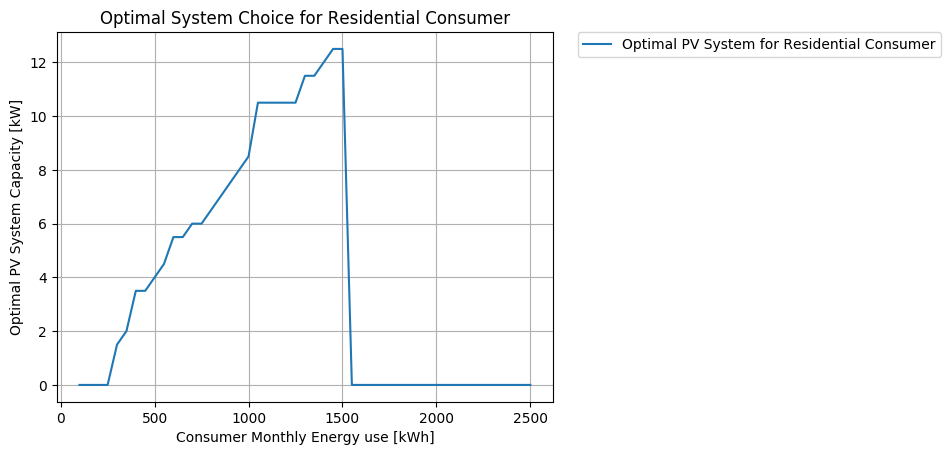

PyObject Text(0.5, 1, 'Optimal System Choice for Residential Consumer')

In [3]:
plot(consumption, pv_res, label = "Optimal PV System for Residential Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Residential Consumer")

## Commercial Industrial Cases
The analysis of optimal adoption in commercial-industrial cases uses a decision making model as follows: 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 6.0 % the same as the reference rate of risk free APY in colones

In [4]:
consumption1 = 500:50:3000
pv_comind = []
for (ix, co) in enumerate(consumption1)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVComInd, 0.0:0.5:20, BAC1, tariff_increase = true)
    push!(pv_comind, res[1][2])
end

In [5]:
consumption2 = 3500:50:6000
for (ix, co) in enumerate(consumption2)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVComInd, 0.0:1:40, BAC1, tariff_increase = true)
    push!(pv_comind, res[1][2])
end

In [6]:
consumption3 = 6100:100:10000
for (ix, co) in enumerate(consumption3)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    push!(pv_comind, res[1][2])
end

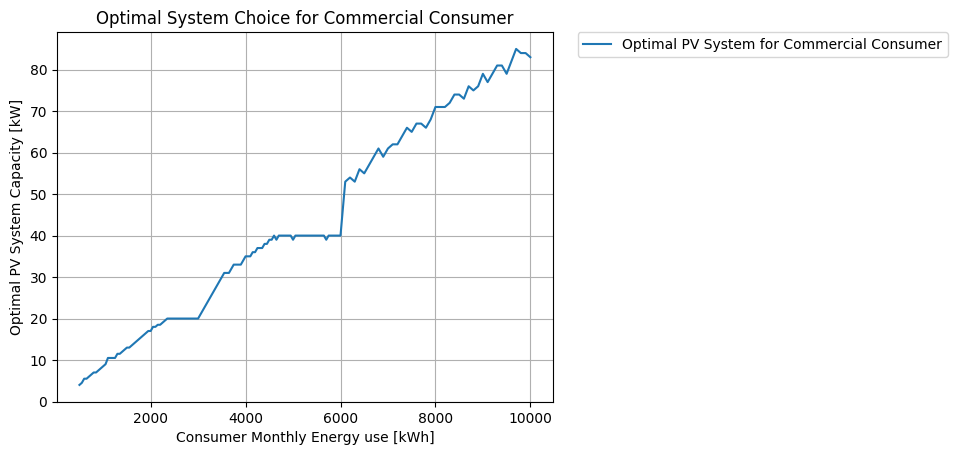

PyObject Text(0.5, 1, 'Optimal System Choice for Commercial Consumer')

In [7]:
plot(vcat(consumption1, consumption2, consumption3), pv_comind, label = "Optimal PV System for Commercial Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Commercial Consumer")

## Medium Voltage Cases
- Uses same criteria as in the Commercial - Industrial cases 

In [8]:
consumption = 10000:5000:100000
pv_tmt = []
for (ix, co) in enumerate(consumption)
     cnfl_mediumvoltage.econsumption = co; get_pmax(cnfl_mediumvoltage);
    res = optimal_pv(cnfl_mediumvoltage, PVTMT, 0:10.0:1000.0, BAC1, tariff_increase = true)
    push!(pv_tmt, res[1][2])
end

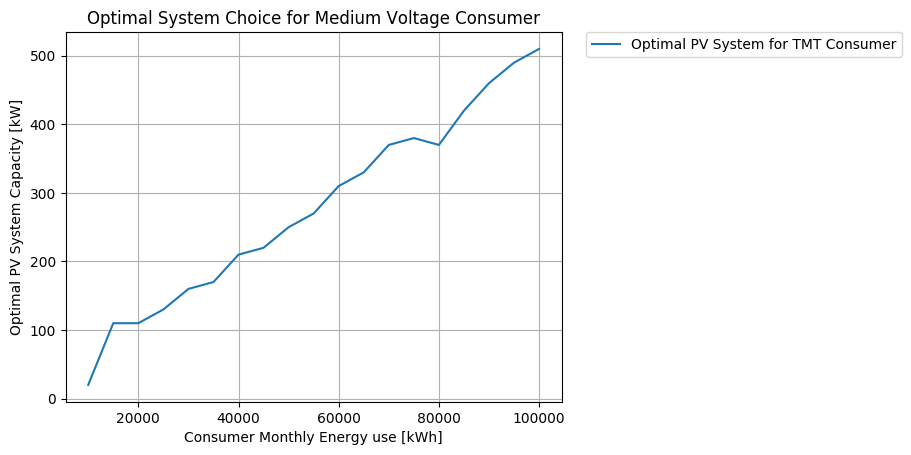

PyObject Text(0.5, 1, 'Optimal System Choice for Medium Voltage Consumer')

In [9]:
plot(consumption,pv_tmt, label = "Optimal PV System for TMT Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Medium Voltage Consumer")

# Alternative Rate Model

# Residential Cases
The analysis of optimal adoption in residential cases uses a decision making model as follows: 
 - The adoption of PV shouldn't induce net economic losses within the 5 years, calculated as the simple sum of the first 60 bills. 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 0.0 since the expectation is to see saving over all the periods. 

In [10]:
consumption = 100:50:2500
pv_alt_res = []
cnfl_residential.tariff = A_R_CNFL
for (ix, co) in enumerate(consumption)
    cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
    res = optimal_pv(cnfl_residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    push!(pv_alt_res, res[1][2])
end

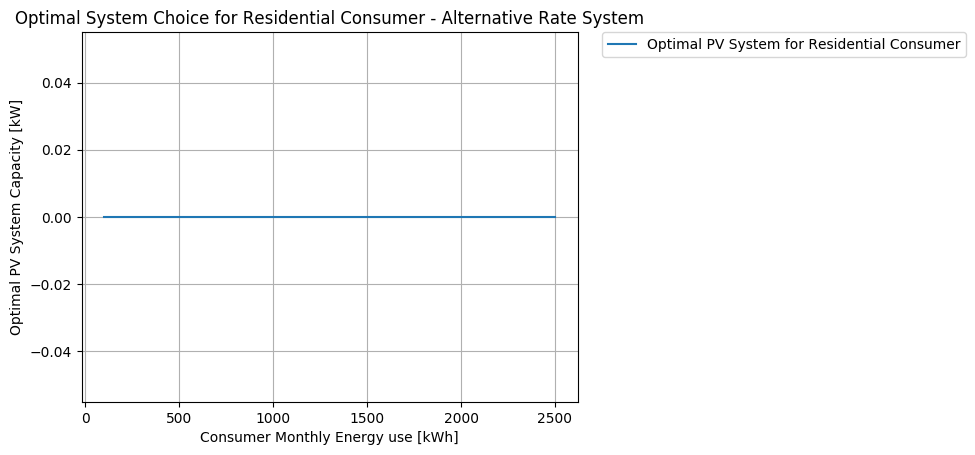

PyObject Text(0.5, 1, 'Optimal System Choice for Residential Consumer - Alternative Rate System')

In [11]:
plot(consumption,pv_alt_res, label = "Optimal PV System for Residential Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Residential Consumer - Alternative Rate System")

# Commercial Industrial Cases
The analysis of optimal adoption in commercial-industrial cases uses a decision making model as follows: 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 6.0 % the same as the reference rate of risk free APY in colones

In [12]:
cnfl_commercial.tariff = A_CI_CNFL
consumption1 = 500:50:3000
pv_alt_comind = []
for (ix, co) in enumerate(consumption1)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVComInd, 0.0:0.5:20, BAC1, tariff_increase = true)
    push!(pv_alt_comind, res[1][2])
end

In [13]:
consumption2 = 3500:50:6000
for (ix, co) in enumerate(consumption2)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVComInd, 0.0:1:40, BAC1, tariff_increase = true)
    push!(pv_alt_comind, res[1][2])
end

In [14]:
consumption3 = 6100:100:10000
for (ix, co) in enumerate(consumption3)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    push!(pv_alt_comind, res[1][2])
end

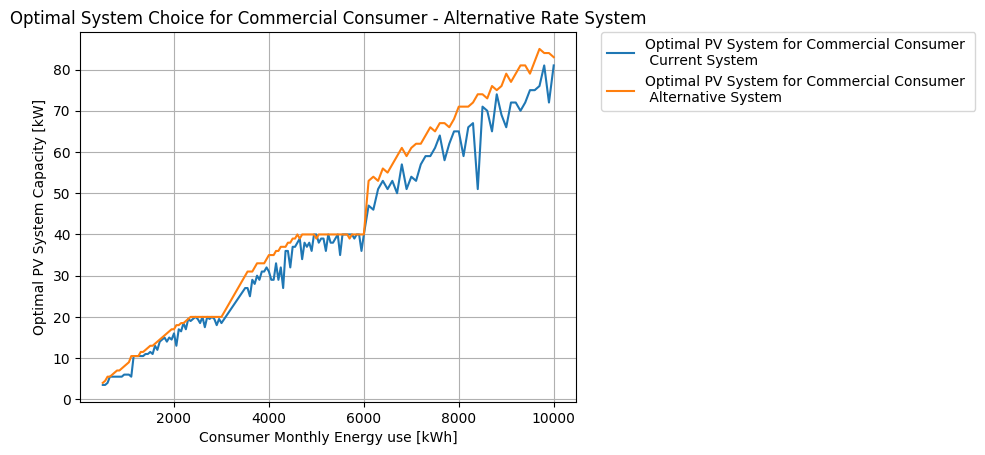

PyObject Text(0.5, 1, 'Optimal System Choice for Commercial Consumer - Alternative Rate System')

In [15]:
plot(vcat(consumption1, consumption2, consumption3),pv_alt_comind, label = "Optimal PV System for Commercial Consumer \n Current System")
plot(vcat(consumption1, consumption2, consumption3),pv_comind, label = "Optimal PV System for Commercial Consumer \n Alternative System")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Commercial Consumer - Alternative Rate System")

# Medium Voltage Cases
- Uses same criteria as in the Commercial - Industrial cases 

In [16]:
cnfl_mediumvoltage.tariff = A_TMT_CNFL
consumption = 10000:5000:100000
pv_alt_tmt = []
for (ix, co) in enumerate(consumption)
     cnfl_mediumvoltage.econsumption = co; get_pmax(cnfl_mediumvoltage);
    res = optimal_pv(cnfl_mediumvoltage, PVTMT, 0:10.0:1000.0, BAC1, tariff_increase = true)
    push!(pv_alt_tmt, res[1][2])
end

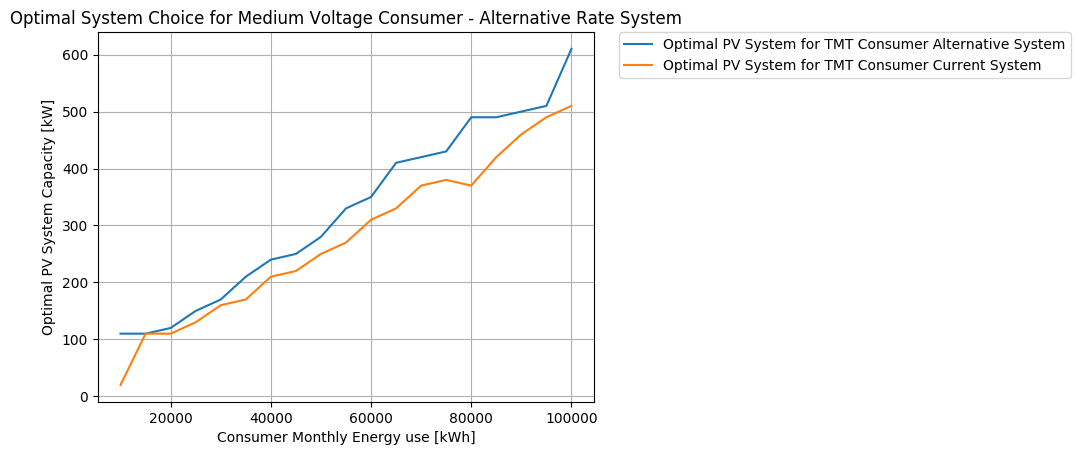

PyObject Text(0.5, 1, 'Optimal System Choice for Medium Voltage Consumer - Alternative Rate System')

In [17]:
plot(consumption, pv_alt_tmt, label = "Optimal PV System for TMT Consumer Alternative System")
plot(consumption, pv_tmt, label = "Optimal PV System for TMT Consumer Current System")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Medium Voltage Consumer - Alternative Rate System")